In [1]:
!pip install streamlit-option-menu

In [2]:
!pip install streamlit_folium

In [3]:
# import
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

In [7]:
finalists_clean_df = pd.read_csv('Data/finalists_cleaned.csv')

In [9]:
# Display the first few rows to verify
print(finalists_clean_df.head())

   year  final_draw_position      country   style  final_televote_points  \
0  2023                   20       Norway     Pop                  216.0   
1  2023                    5       Serbia     Pop                   16.0   
2  2023                    2     Portugal     Pop                   16.0   
3  2023                   25      Croatia     Pop                  112.0   
4  2023                    3  Switzerland  Ballad                   31.0   

   final_jury_points  final_televote_votes  final_jury_votes  final_place  \
0               52.0                  36.0              11.0          5.0   
1               14.0                   4.0               6.0         24.0   
2               43.0                   3.0               9.0         23.0   
3               11.0                  20.0               2.0         13.0   
4               61.0                  10.0              15.0         20.0   

   final_total_points  
0               268.0  
1                30.0  
2       

In [11]:
finalists_clean_df.shape

(358, 10)

In [13]:
finalists_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   358 non-null    int64  
 1   final_draw_position    358 non-null    int64  
 2   country                358 non-null    object 
 3   style                  358 non-null    object 
 4   final_televote_points  326 non-null    float64
 5   final_jury_points      326 non-null    float64
 6   final_televote_votes   230 non-null    float64
 7   final_jury_votes       230 non-null    float64
 8   final_place            358 non-null    float64
 9   final_total_points     358 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 28.1+ KB


In [15]:
y = finalists_clean_df['final_place']

# Features: drop target and categorical variables
X = finalists_clean_df.drop(columns=['final_place', 'country', 'style','year','final_total_points'])

# Define numeric feature names (all remaining)
numeric_features = X.columns.tolist()


In [17]:
print("Missing values BEFORE fillna:")
print(X.isnull().sum())

X = X.fillna(X.mean())  # Fill missing values

print("Missing values AFTER fillna:")
print(X.isnull().sum())

Missing values BEFORE fillna:
final_draw_position        0
final_televote_points     32
final_jury_points         32
final_televote_votes     128
final_jury_votes         128
dtype: int64
Missing values AFTER fillna:
final_draw_position      0
final_televote_points    0
final_jury_points        0
final_televote_votes     0
final_jury_votes         0
dtype: int64


In [19]:
y.head()

0     5.0
1    24.0
2    23.0
3    13.0
4    20.0
Name: final_place, dtype: float64

In [133]:
# Split the dataset (74/26)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)


In [135]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(257, 5)
(257,)
(101, 5)
(101,)


In [138]:
model = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', LinearRegression())
])

In [140]:
# Fit and predict
model.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('regressor', LinearRegression())])

In [142]:
reg = model.named_steps['regressor']


In [144]:
print("Intercept:", reg.intercept_)
print("Coefficients:", reg.coef_)

feature_names = X_train.columns
coef_table = list(zip(feature_names, reg.coef_))
for name, coef in coef_table:
    print(f"{name:30} {coef:>10.4f}")


Intercept: 22.79330810940539
Coefficients: [-0.0397849  -0.04098076 -0.04100323 -0.03172452 -0.06454984]
final_draw_position               -0.0398
final_televote_points             -0.0410
final_jury_points                 -0.0410
final_televote_votes              -0.0317
final_jury_votes                  -0.0645


In [146]:
y_pred = model.predict(X_test)

In [148]:
import sys
import os

# Use the current working directory instead of __file__
current_directory = os.getcwd()

# Add the path to the 'Modules' folder (adjust the path to reach the Modules folder)
sys.path.append(os.path.join(current_directory, 'Modules'))

# Now import the evalute function
from machine_learning.evaluate import evaluate_model

# Assuming you have your model, X_test, and y_test defined somewhere
evaluation_results = evaluate_model(model, X_test, y_test)

# Print the evaluation metrics in a formatted way
print("Model Evaluation Results:")
print("----------------------------")
for metric, value in evaluation_results.items():
    if metric != 'predictions':
        print(f"{metric}: {value:.4f}")
    else:
        print(f"\nPredictions (showing first 10 for brevity):")
        print(", ".join([f"{v:.2f}" for v in value[:10]]))  # Only show the first 10 predictions

Model Evaluation Results:
----------------------------
MAE: 2.9945
MSE: 13.5437
RMSE: 3.6802
R2: 0.7339

Predictions (showing first 10 for brevity):
20.13, 14.41, 14.95, 11.82, 18.44, 13.36, 17.90, 17.64, 13.24, 13.42


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [150]:
y_pred

array([20.12602242, 14.41023907, 14.94630407, 11.82392201, 18.43920052,
       13.3564929 , 17.9049609 , 17.63685703, 13.23600294, 13.41590593,
       18.19291888, 12.99729351, 16.44558153, 13.7134218 , 19.14876733,
       19.47227377, 20.41311245, 15.27048281, 14.63208258, 13.35085071,
       12.58539098, 13.03707841, 13.7532067 , 11.33873458, 16.25001882,
       14.48073848,  6.31175969,  7.37617552, 20.38882706, -1.79303791,
       16.19526012, -1.87704898, 14.13546921, 21.92012132, 11.40244586,
       15.3160954 ,  5.34559691, 14.29641143,  6.66189938, 18.18865823,
       19.57436774, 10.30039092,  6.50532098, 19.71713586, -0.63899594,
       13.63385199, 18.01380471,  4.47376165, 20.45374003, 17.94893436,
       17.48830691, 16.29052283, 12.96221152, 20.38038867, 13.03331306,
       17.47032572, 15.99421495, 16.90511122, 17.09807839, 13.35535765,
       17.72019833,  9.04089034, 13.70408316, 14.43140959, 21.94442516,
       18.81640648,  5.93351814, 19.68627143, 19.28874323,  7.55

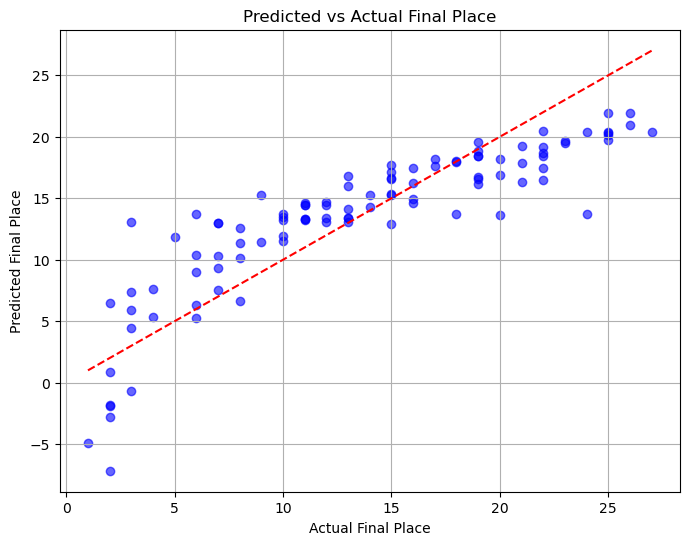

In [152]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal
plt.xlabel('Actual Final Place')
plt.ylabel('Predicted Final Place')
plt.title('Predicted vs Actual Final Place')
plt.grid(True)
plt.show()

In [154]:
y_test.iloc[0]

25.0

In [156]:
y_pred[0]

20.126022418930294

## Store model

In [160]:
import joblib

In [162]:
# Store the model in a file
model_file = 'Models/finalistfit.pkl'

In [164]:
# save the model
joblib.dump(model, model_file)

['Models/finalistfit.pkl']